# Projeto

In [1]:
import pandas as pd
import re
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

In [2]:
from pandas import DataFrame

file_tag = 'credit_score'
filename = 'class_credit_score.csv'
original_dataset: DataFrame = pd.read_csv(filename, index_col='ID', sep=',', decimal='.', na_values='')

original_dataset.dtypes

Customer_ID                object
Month                      object
Name                       object
Age                        object
SSN                        object
Occupation                 object
Annual_Income             float64
Monthly_Inhand_Salary     float64
Num_Bank_Accounts           int64
Num_Credit_Card             int64
Interest_Rate               int64
NumofLoan                   int64
Type_of_Loan               object
Delay_from_due_date         int64
NumofDelayedPayment       float64
ChangedCreditLimit        float64
NumCreditInquiries        float64
CreditMix                  object
OutstandingDebt           float64
CreditUtilizationRatio    float64
Credit_History_Age         object
Payment_of_Min_Amount      object
TotalEMIpermonth          float64
Amountinvestedmonthly     float64
Payment_Behaviour          object
MonthlyBalance            float64
Credit_Score               object
dtype: object

*Tratar de valores de input errados*


In [3]:
import numpy as np

columns_to_treat = ["Age", "SSN", "Num_Bank_Accounts", "Interest_Rate", "NumofLoan", "Payment_of_Min_Amount", "MonthlyBalance"]
relevant = ["Age", "Num_Bank_Accounts", "Interest_Rate", "NumofLoan", "Payment_of_Min_Amount", "MonthlyBalance"]

df = pd.DataFrame(original_dataset)

#df['Age'] = df['Age'].apply(lambda x: np.nan if x == -500 or x >= 150 else x)
# corrigir formatacao
df['Age'] = df['Age'].astype(str).str.replace('_', '', regex=False)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check and clean 'SSN' column
pattern = r'^\d{3}-\d{2}-\d{4}$'  # Replace this with your SSN regex pattern
df['SSN'] = df['SSN'].apply(lambda x: x if re.match(pattern, str(x)) else np.nan)

#df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: x if x >= 0 else np.nan)

#df['Interest_Rate'] = df['Interest_Rate'].apply(lambda x: x if x >= 0 and x <= 100 else np.nan) TAXAS JURO ACIMA DE 30 MUITO IMPROVAVEL

#df['NumofLoan'] = df['NumofLoan'].apply(lambda x: x if x >= 0 else np.nan)

#df['MonthlyBalance'] = df['MonthlyBalance'].apply(lambda x: x if x >= 0 else np.nan)

In [4]:
from dslabs_functions import get_variable_types

variables_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variables_types["numeric"]
print(numeric)

['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'NumofLoan', 'Delay_from_due_date', 'NumofDelayedPayment', 'ChangedCreditLimit', 'NumCreditInquiries', 'OutstandingDebt', 'CreditUtilizationRatio', 'TotalEMIpermonth', 'Amountinvestedmonthly', 'MonthlyBalance']


## Data Profiling

### Data Dimensionality

#### Figure 1 Nr Records x Nr numeric

*vale a pena experimentar com outros tipos de gráficos???*
- nao ha curse of dimensionality

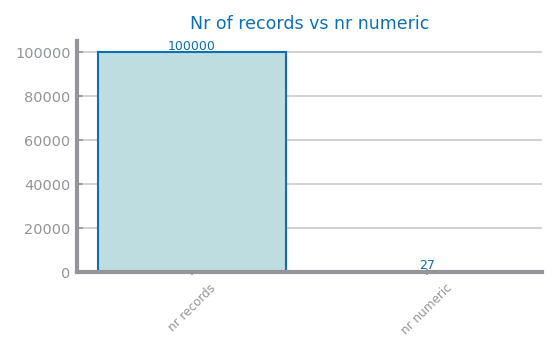

In [5]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": df.shape[0], "nr numeric": df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr numeric"
)
savefig(f"images/dim_dist/fig_1_records_variables.png", bbox_inches='tight')
show()

#### Figure 2 mr variables per type

*Rever tipos de daods da função get_variable_type*
- Trocar "Age" de simbólico para numérico, dataset tinha a formatacao errada

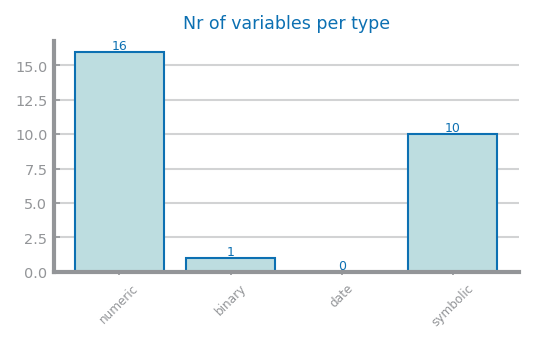

In [6]:
from dslabs_functions import get_variable_types

variable_types: dict[str, list] = get_variable_types(df)

counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
savefig(f"images/dim_dist/fig_2_variable_types.png", bbox_inches='tight')
show()

*Passar de object para category (simbolicas no panda)*

In [7]:
symbolic: list[str] = variable_types["symbolic"]
df[symbolic] = df[symbolic].apply(lambda x: x.astype("category"))

#### Figure 3 Nr missing values for dataset

In [8]:
mv = {}

for var in df.columns:
    nr = df[var].isna().sum()
    print(var + " - " + str(nr))
    if nr > 0:
        mv[var] = nr

Customer_ID - 0
Month - 0
Name - 9985
Age - 0
SSN - 5572
Occupation - 7062
Annual_Income - 0
Monthly_Inhand_Salary - 15002
Num_Bank_Accounts - 0
Num_Credit_Card - 0
Interest_Rate - 0
NumofLoan - 0
Type_of_Loan - 11408
Delay_from_due_date - 0
NumofDelayedPayment - 7002
ChangedCreditLimit - 2091
NumCreditInquiries - 1965
CreditMix - 20195
OutstandingDebt - 0
CreditUtilizationRatio - 0
Credit_History_Age - 9030
Payment_of_Min_Amount - 0
TotalEMIpermonth - 0
Amountinvestedmonthly - 4479
Payment_Behaviour - 7600
MonthlyBalance - 1200
Credit_Score - 0


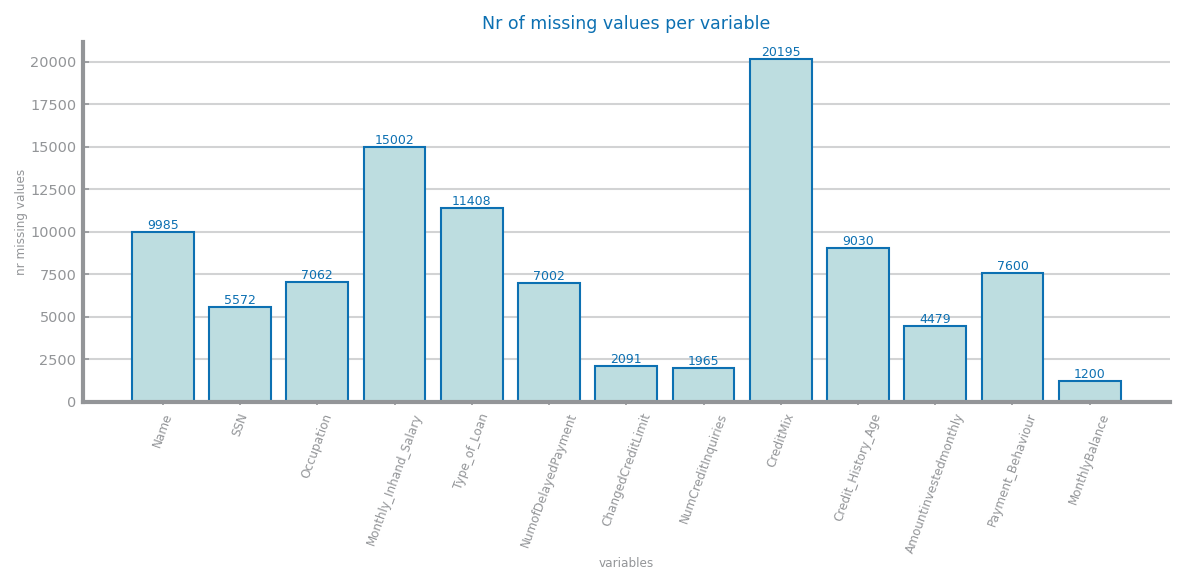

In [9]:
from matplotlib import pyplot as plt


mv: dict[str, int] = {}

for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure(figsize=(8, 4))
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
plt.xticks(rotation=70)
plt.tight_layout()
savefig(f"images/dim_dist/figure_3_mv.png", bbox_inches='tight')
show()

*Valores nulos em percentagem(%)*

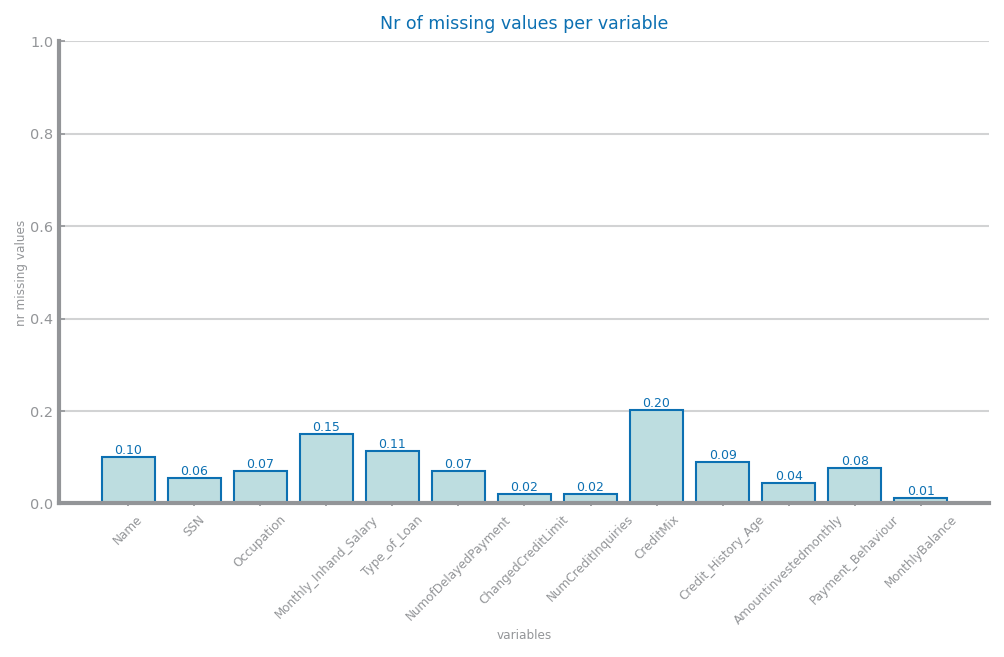

In [10]:
mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()
    percentage = (nr / len(df[var]))
    if nr > 0:
        mv[var] = percentage

figure(figsize=(8, 4))
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
    percentage=True
)
savefig(f"images/dim_dist/figure_3_mv_percentages.png", bbox_inches='tight')
show()

### Data Distribution

In [11]:
summary5: DataFrame = df.describe(include='all')
summary5

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,Credit_History_Age,Payment_of_Min_Amount,TotalEMIpermonth,Amountinvestedmonthly,Payment_Behaviour,MonthlyBalance,Credit_Score
count,100000,100000,90015,100000.000000,94428,92938,1.000000e+05,84998.000000,100000.000000,100000.00000,...,79805,100000.000000,100000.000000,90970,100000,100000.000000,95521.000000,92400,9.880000e+04,100000
unique,12500,8,10139,NaN,12500,15,NaN,NaN,NaN,NaN,...,3,NaN,NaN,404,3,NaN,NaN,6,NaN,2
top,CUS_0x1000,April,Langep,NaN,000-08-1349,Lawyer,NaN,NaN,NaN,NaN,...,Standard,NaN,NaN,15 Years and 11 Months,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Good
freq,8,12500,44,NaN,8,6575,NaN,NaN,NaN,NaN,...,36479,NaN,NaN,446,52326,NaN,NaN,25513,NaN,71002
mean,NaN,NaN,NaN,110.649700,NaN,NaN,1.764157e+05,4194.170850,17.091280,22.47443,...,NaN,1426.220376,32.285173,NaN,NaN,1403.118217,637.412998,NaN,-3.036434e+22,NaN
std,NaN,NaN,NaN,686.244717,NaN,NaN,1.429618e+06,3183.686167,117.404834,129.05741,...,NaN,1155.129026,5.116875,NaN,NaN,8306.041270,2043.319327,NaN,3.181292e+24,NaN
min,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.645417,-1.000000,0.00000,...,NaN,0.230000,20.000000,NaN,NaN,0.000000,0.000000,NaN,-3.333330e+26,NaN
25%,NaN,NaN,NaN,24.000000,NaN,NaN,1.945750e+04,1625.568229,3.000000,4.00000,...,NaN,566.072500,28.052567,NaN,NaN,30.306660,74.534002,NaN,2.700922e+02,NaN
50%,NaN,NaN,NaN,33.000000,NaN,NaN,3.757861e+04,3093.745000,6.000000,5.00000,...,NaN,1166.155000,32.305784,NaN,NaN,69.249473,135.925681,NaN,3.367192e+02,NaN
75%,NaN,NaN,NaN,42.000000,NaN,NaN,7.279092e+04,5957.448333,7.000000,7.00000,...,NaN,1945.962500,36.496663,NaN,NaN,161.224249,265.731733,NaN,4.702202e+02,NaN


#### Figure 4 Global Boxplots

*Não nos dá informação quase nenhuma*
- Boxplots are not applicable to non-numeric variables.

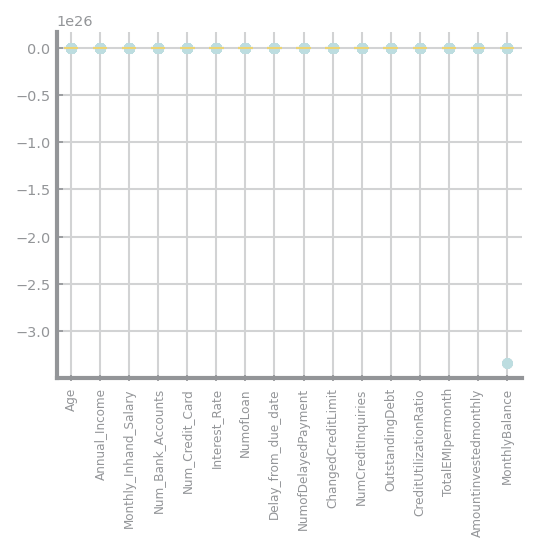

In [12]:
from matplotlib.pyplot import savefig, show
from dslabs_functions import get_variable_types

# hist_age = df["Credit_History_Age"]
# hist_vals = []

# for val in hist_age:
#     matches = re.findall(r'(\d+) Years and (\d+) Months', str(val))
#     if matches == []:
#         hist_vals += [np.nan]
#     else:
#         hist_vals += [float(matches[0][0]) + ((float(matches[0][1])-1)/12) ,]

# df["CreditHistoryAge"] = hist_vals
# numeric = df.select_dtypes(include=['number', 'float']).columns.tolist()

if [] != numeric:
    df[numeric].boxplot(rot=90)
    savefig(f"images/dim_dist/fig_4_global_boxplot.png", bbox_inches='tight')
    show()
else:
    print("There are no numeric variables.")

1. Chegamos à conclusao que nao tiramos partido em termos 9 records da variavel mothly_balance e retiramos para obter melhores conclusoes
2. Retirar 'Anual_Income' & 'TotalEMIpermonth' para conseguir tirar outras conclusao, no fundo tratar como boxplots singulares é melhor/ outra perspetiva
3. conseguimos perceber que ha valores de idade invalidos (negativos)

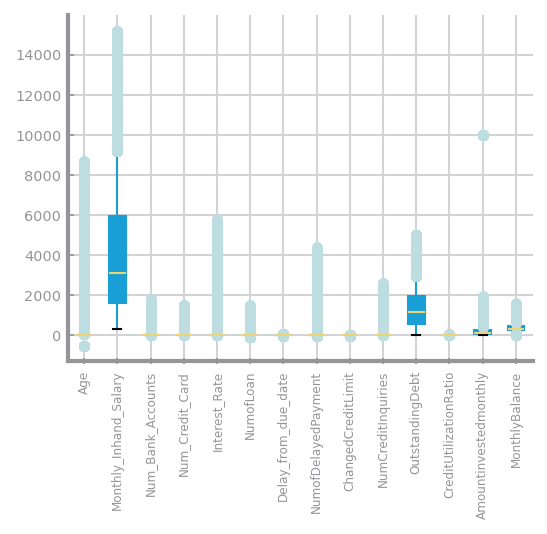

In [13]:
# valores 'Mothly_Balance' retirados
df['MonthlyBalance'] = df['MonthlyBalance'].apply(lambda x: x if x >= 0 else np.nan)

if [] != numeric:
    excluded_indices = {1, len(numeric) - 3}
    numeric_excluded = [var for idx, var in enumerate(numeric) if idx not in excluded_indices]
    df[numeric_excluded].boxplot(rot=90)
    savefig(f"images/dim_dist/fig_4_global_boxplot_without_vars.png", bbox_inches='tight')
    show()
else:
    print("There are no numeric variables.")

*Exemplo do que se pode fazer para outras colunas como o 'Monthly_Balance'*

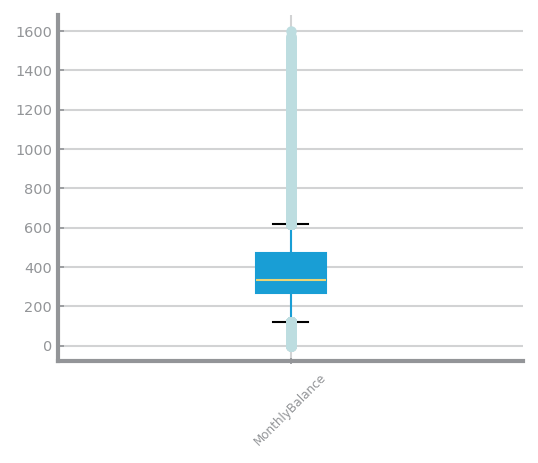

In [14]:
import numpy as np
from matplotlib.pyplot import savefig, show
from dslabs_functions import get_variable_types

monthly_bal = ["MonthlyBalance"]
if monthly_bal:
    dataset_copy = df.copy()

    dataset_copy[monthly_bal] = dataset_copy[monthly_bal].replace(-3.33333E+26, np.nan)

    dataset_copy[monthly_bal].boxplot(rot=45)
    savefig(f"images/dim_dist/fig_6_monthly_bal_only_boxplot_noMV.png")
    show()
else:
    print("There are no numeric variables.")

#### Figure 6 Single Variable Boxplots

1. conseguimos perceber que ha valores de idade invalidos (negativos)
2. tratar outliers

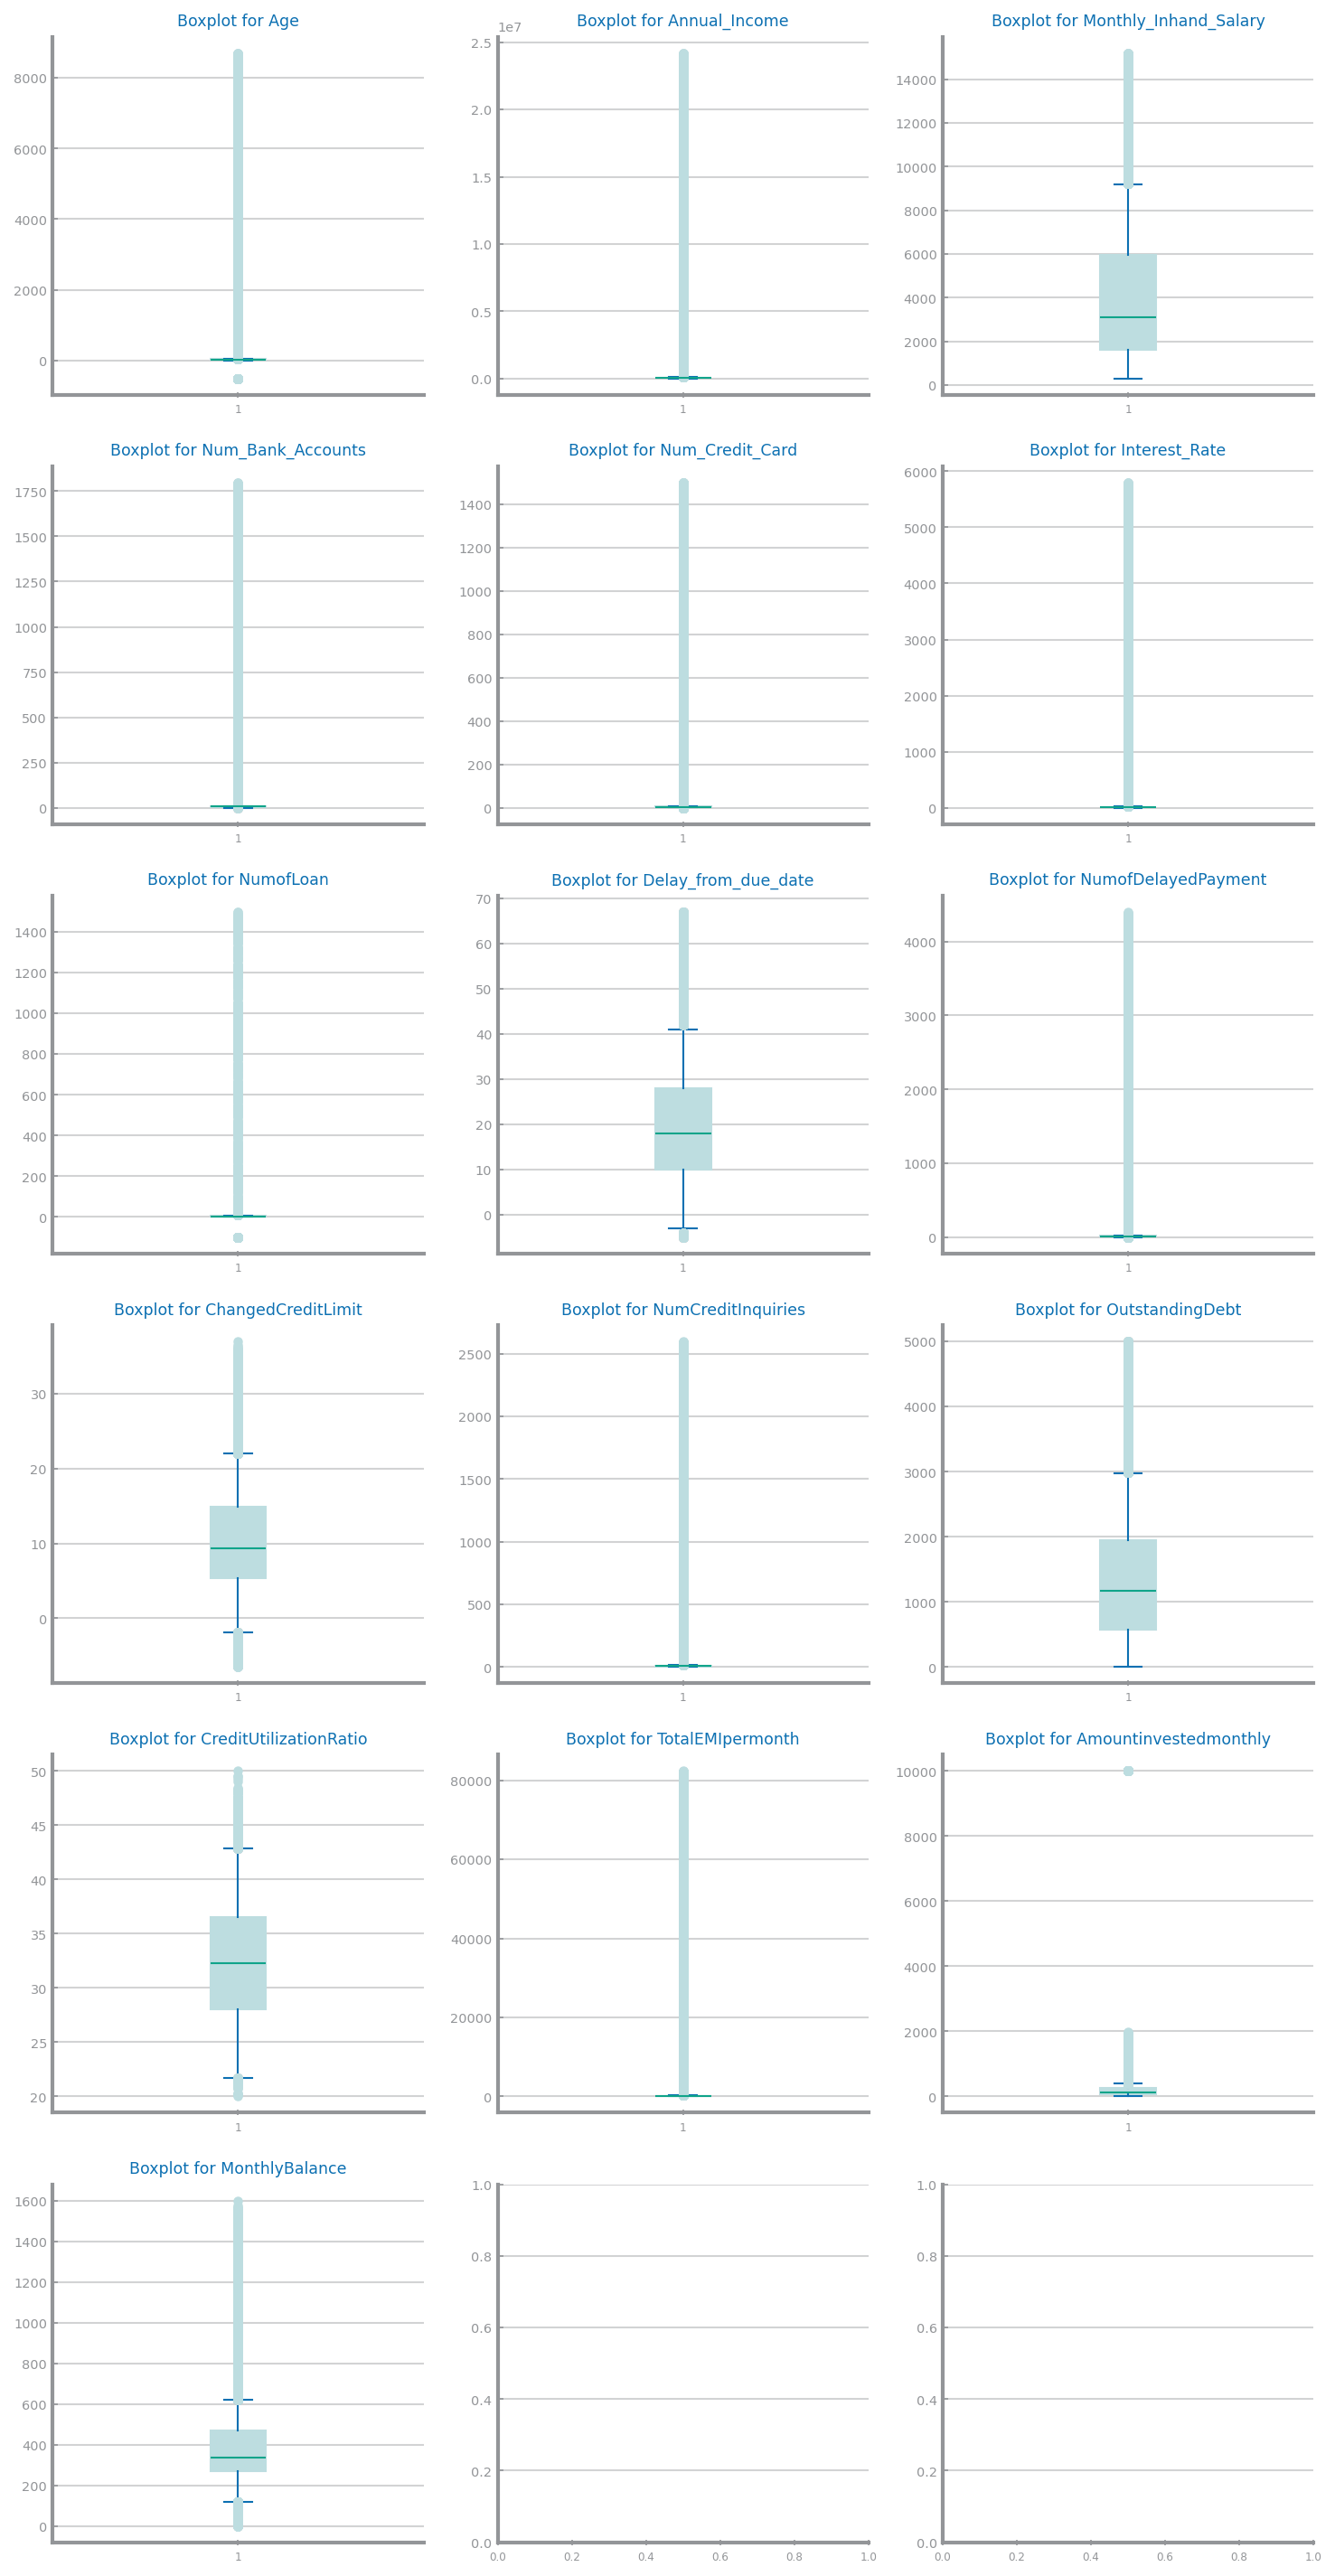

In [15]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(df[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/dim_dist/fig_6_single_boxplots.png")
    show()
else:
    print("There are no numeric numeric.")

1. Singular boxplots para mostrar atraves dos graficos fig_10 produzidos (e os valores de iqrfactor & stndev), que ha outliers que podem ser retirado, na fase de "Data Preparation" (conseguimos ter outra ideia dos boxplots -desenvolver mais esta parte no relatorio-)<br>
*MonthlyBalance Missing Values removed to analyse the Boxplot better// Faz sentido? Fazer o mesmo para outras?*

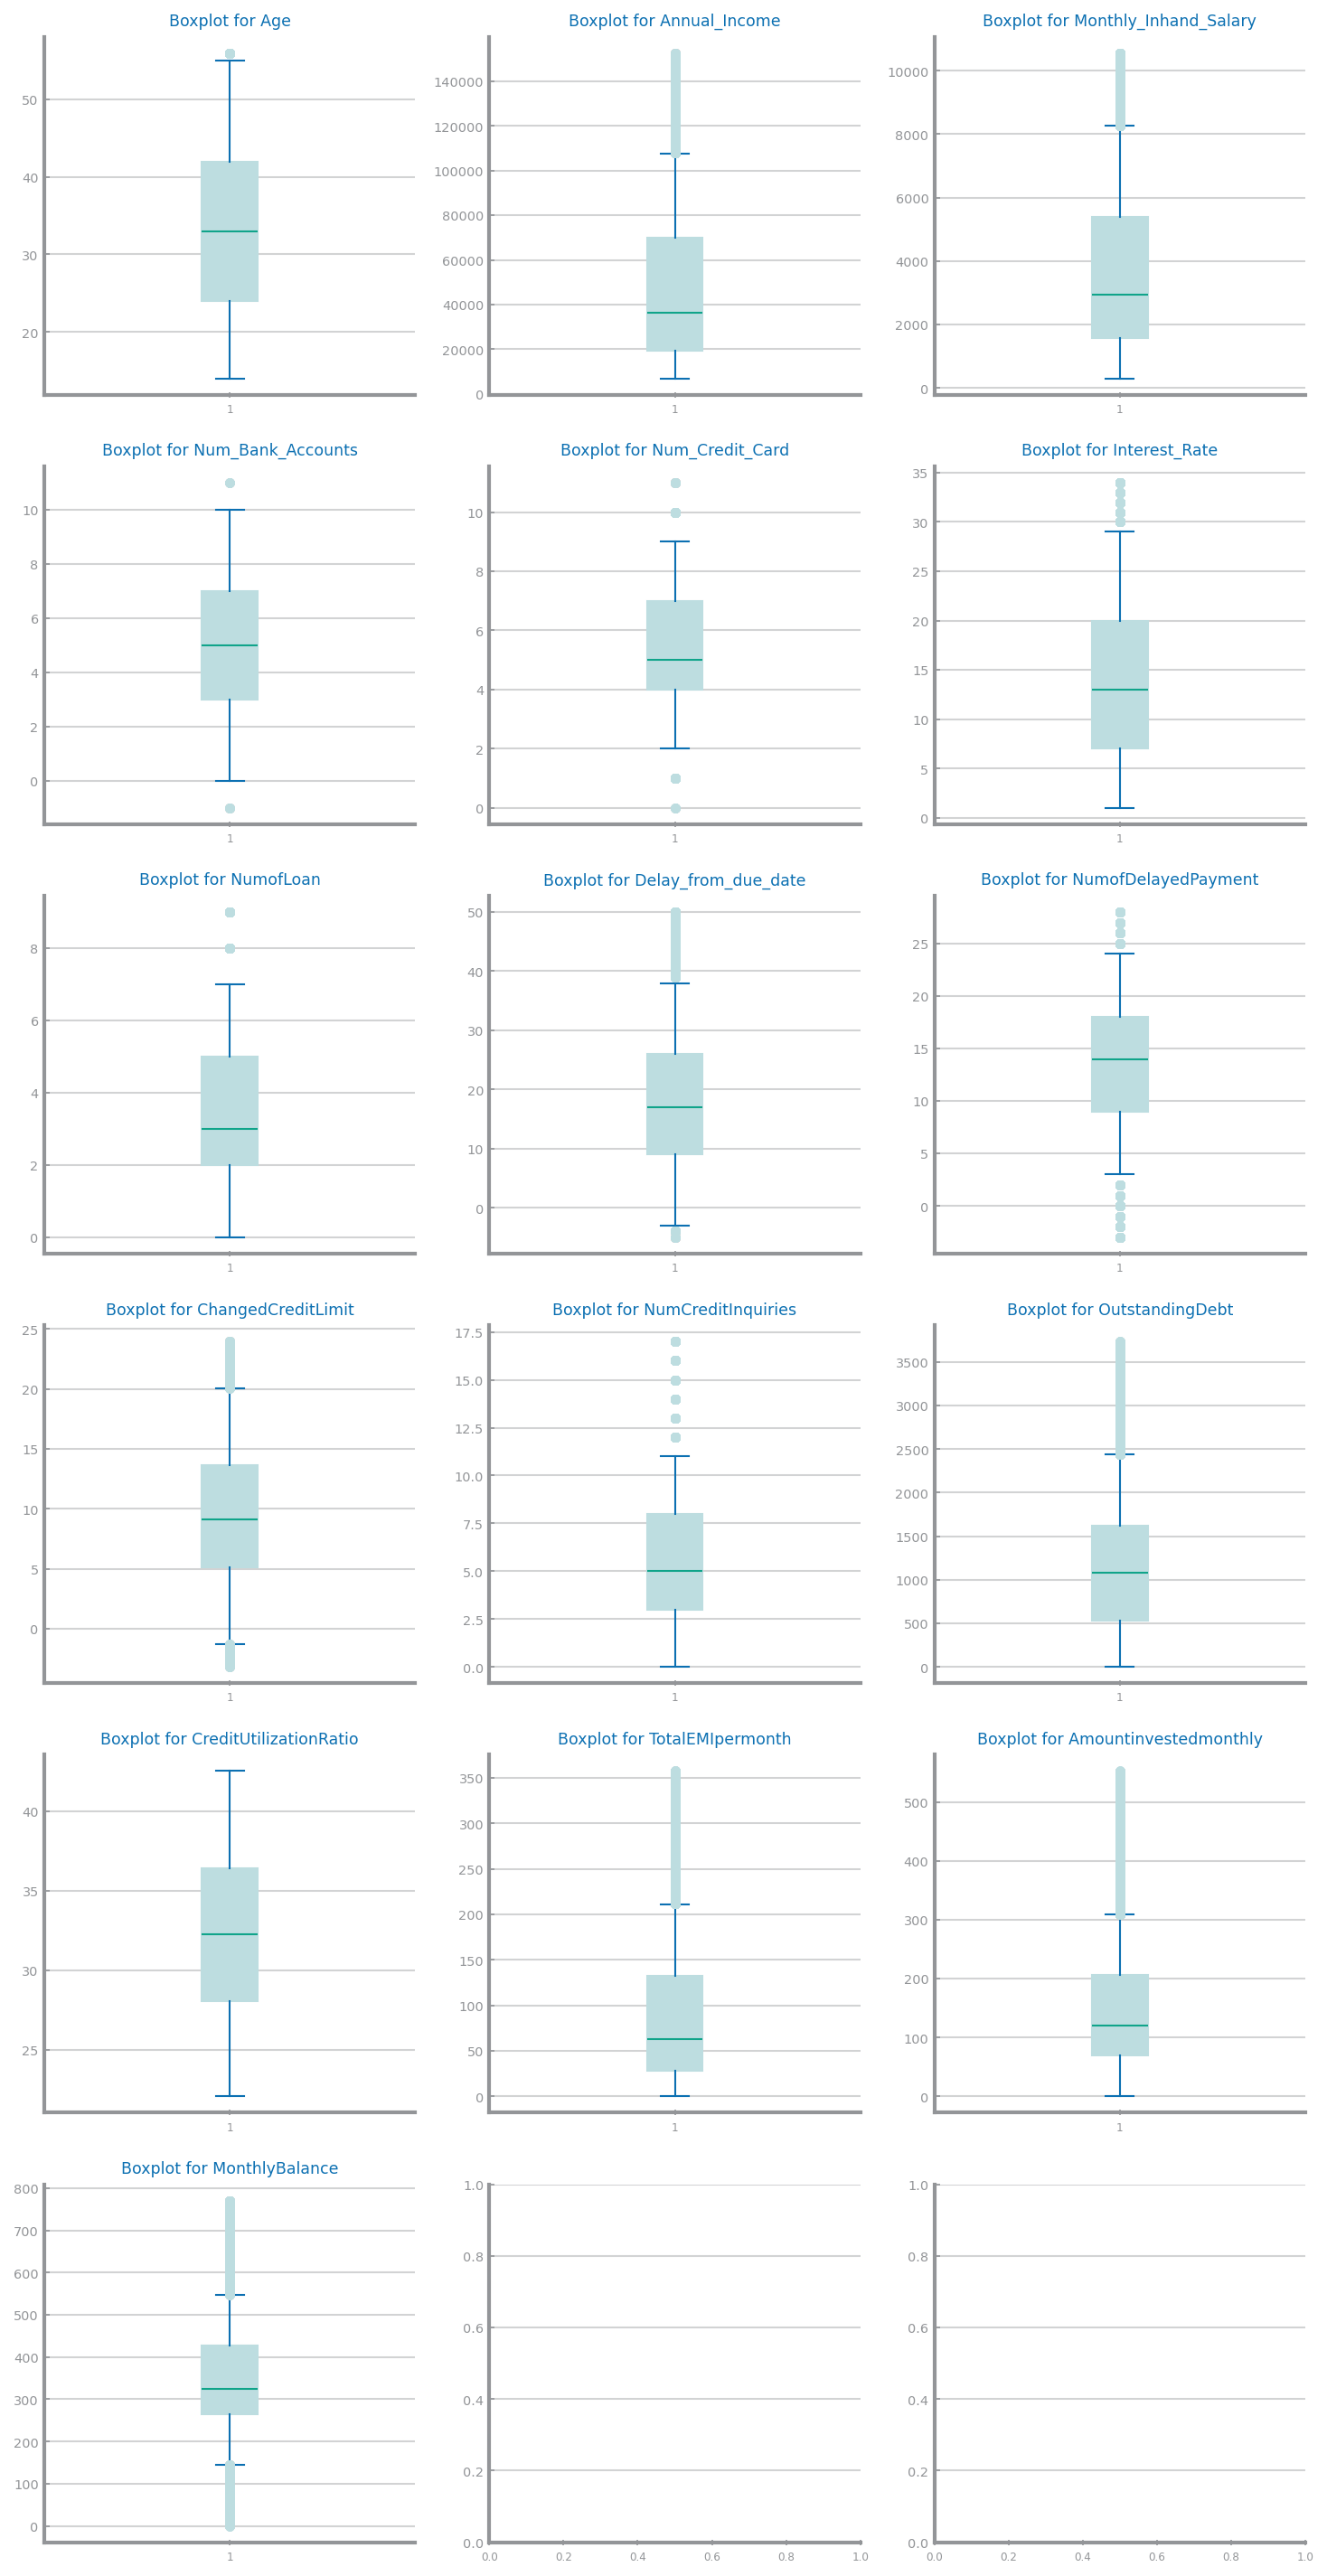

In [16]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT
import pandas as pd

## para cada variavel ou um geral??? posso passar para cada variavel

iqr_factor = 1.5
num_std_dev = 2

if numeric:
    rows, cols = define_grid(len(numeric))
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)

    i, j = 0, 0
    for column in numeric:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        mean = df[column].mean()
        std = df[column].std()

        filtered = df[column].dropna()
        filtered = filtered[~((filtered < (Q1 - iqr_factor * IQR)) | (filtered > (Q3 + iqr_factor * IQR)))]
        filtered = filtered[(filtered > (mean - num_std_dev * std)) & (filtered < (mean + num_std_dev * std))]

        axs[i, j].set_title(f"Boxplot for {column}")
        axs[i, j].boxplot(filtered.values)

        j += 1
        if j == cols:
            i += 1
            j = 0

    savefig("images/dim_dist/fig_10_outliers_study_boxplots.png")
    show()
else:
    print("There are no numeric columns.")


#### Figure 8 Histograms

*Numericos*<br><br>

*Explicar o pq de tirar alguma variaveis invalidas como age novamente ou numeros negativos em geral*

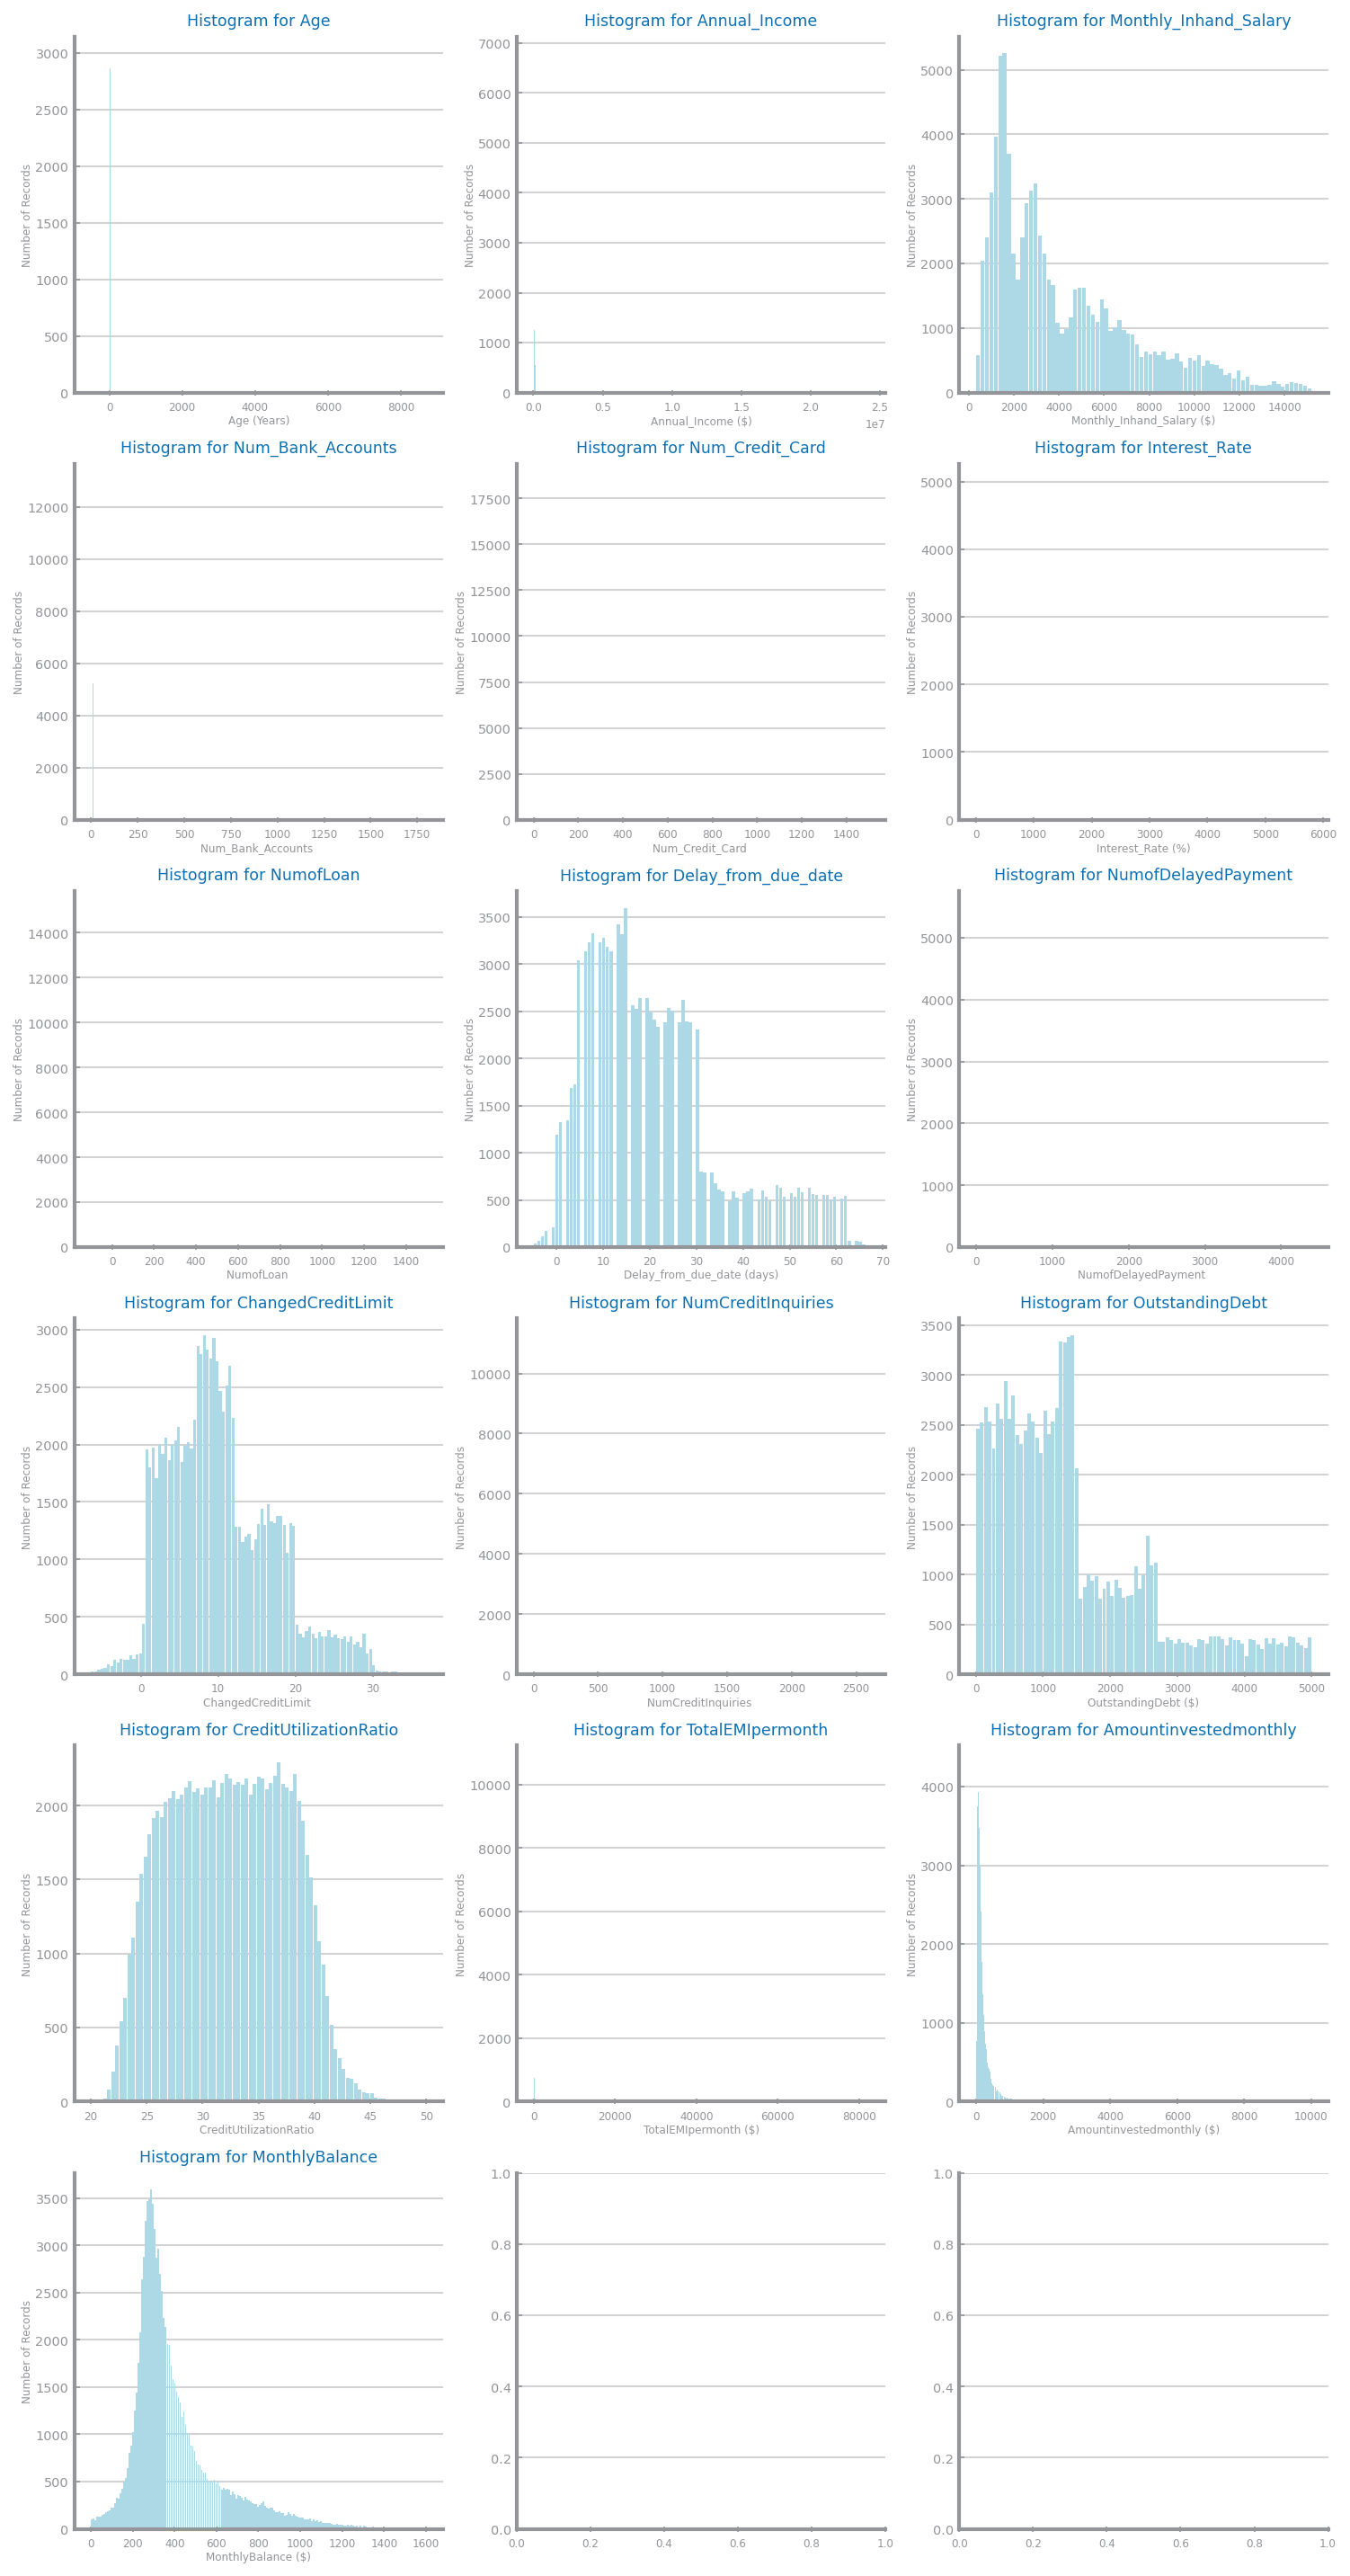

In [17]:
import matplotlib.pyplot as plt
import dslabs_functions as ds
import re
import numpy as np

units = {
    "Age": "(Years)",
    "Annual_Income": "($)",
	"Monthly_Inhand_Salary": "($)",
	"Num_Bank_Accounts": "",
    "Num_Credit_Card": "",
	"Interest_Rate": "(%)",
	"NumofLoan": "",
	"Delay_from_due_date": "(days)",
    "NumofDelayedPayment": "",
	"ChangedCreditLimit": "",
	"NumCreditInquiries": "",
    "OutstandingDebt": "($)",
	"CreditUtilizationRatio": "",
	"TotalEMIpermonth": "($)",
    "Amountinvestedmonthly": "($)",
	"MonthlyBalance": "($)",
}

t = df.select_dtypes(include=['number', 'float'])
t["Age"] = pd.to_numeric(df['Age'], errors='coerce')
variables = t.columns
rows, cols = ds.define_grid(len(variables))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s' % variables[n])
    axs[i, j].set_xlabel(f'{variables[n]} {units[variables[n]]}')
    axs[i, j].set_ylabel('Number of Records')

    axs[i, j].hist(t[variables[n]].values, "auto", color='lightblue', rwidth=0.9)

    i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

savefig(f"images/dim_dist/fig_8_histogram_numeric.png")  # Save the figure
show()

*Simbólicos*

In [18]:
# # Select columns with numerical and string data types
# from matplotlib import pyplot as plt
# import dslabs_functions as ds
# print(df.select_dtypes(include="category").columns)
# # Select columns with numerical and string data types
# string_cols = df.select_dtypes(include="category").columns
# symbolic_cols = string_cols#[col for col in string_cols if col not in ["ID", "Name", "Customer_ID", "SSN", "Age", "Credit_History_Age"]]

# # Combine numerical and string columns
# rows, cols = ds.define_grid(len(symbolic_cols))

# print(cols * ds.HEIGHT, rows * ds.HEIGHT)
# fig, axs = plt.subplots(rows, cols, figsize=(cols * ds.HEIGHT, rows * ds.HEIGHT))
# i, j = 0, 0
# plt.subplots_adjust(hspace=1)

            
# types = df["Type_of_Loan"]

# types_values = []
# for text in types:
#     matches = re.findall(r'([\w\s-]+)(?:, | and |$)', str(text))
#     m_filtered = [m if "and" not in m else m[4:] for m in matches]
#     types_values += m_filtered

# final = pd.Series(types_values).value_counts()

# axs[i, j].set_title('Histogram for %s' % "Type_of_Loan")
# axs[i, j].set_xlabel("Type_of_Loan")
# axs[i, j].set_ylabel('Number of Records')
# axs[i, j].bar(final.index, final.values, color = "lightblue")
# axs[i, j].set_xticklabels(final.index, rotation=90)
# i, j = i, j+1

# for col in symbolic_cols:
#     if col != "Type_of_Loan":
#         axs[i, j].set_title('Histogram for %s' % col)
#         axs[i, j].set_xlabel(col)
#         axs[i, j].set_ylabel('Number of Records')
#         value_counts = df[col].value_counts()
#         axs[i, j].bar(value_counts.index, value_counts.values, color='lightblue')
#         axs[i, j].set_xticklabels(value_counts.index, rotation=90)
#         i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)

# plt.savefig(f"images/dim_dist/fig_8_histogram_symbolic.png")  # Save the figure
# plt.show()

1. no de cima chegamos a conclusao que devemos retirar as variaveis que representam uma colunas identificadora <br>
2. falar de colunas em que nao se tirar nenhuma conclusao devido ao grande numero de possibilidades nominais e mesmo ao agrupar nao obtemos relacoes/informacoes relevantes   
3. ... e credit_history_age deve ser avaliada como uma variavel numerica '22 years and 2 months´, dentro do modelo e para tirar conclusoes

Index(['Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan',
       'CreditMix', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')
12 8


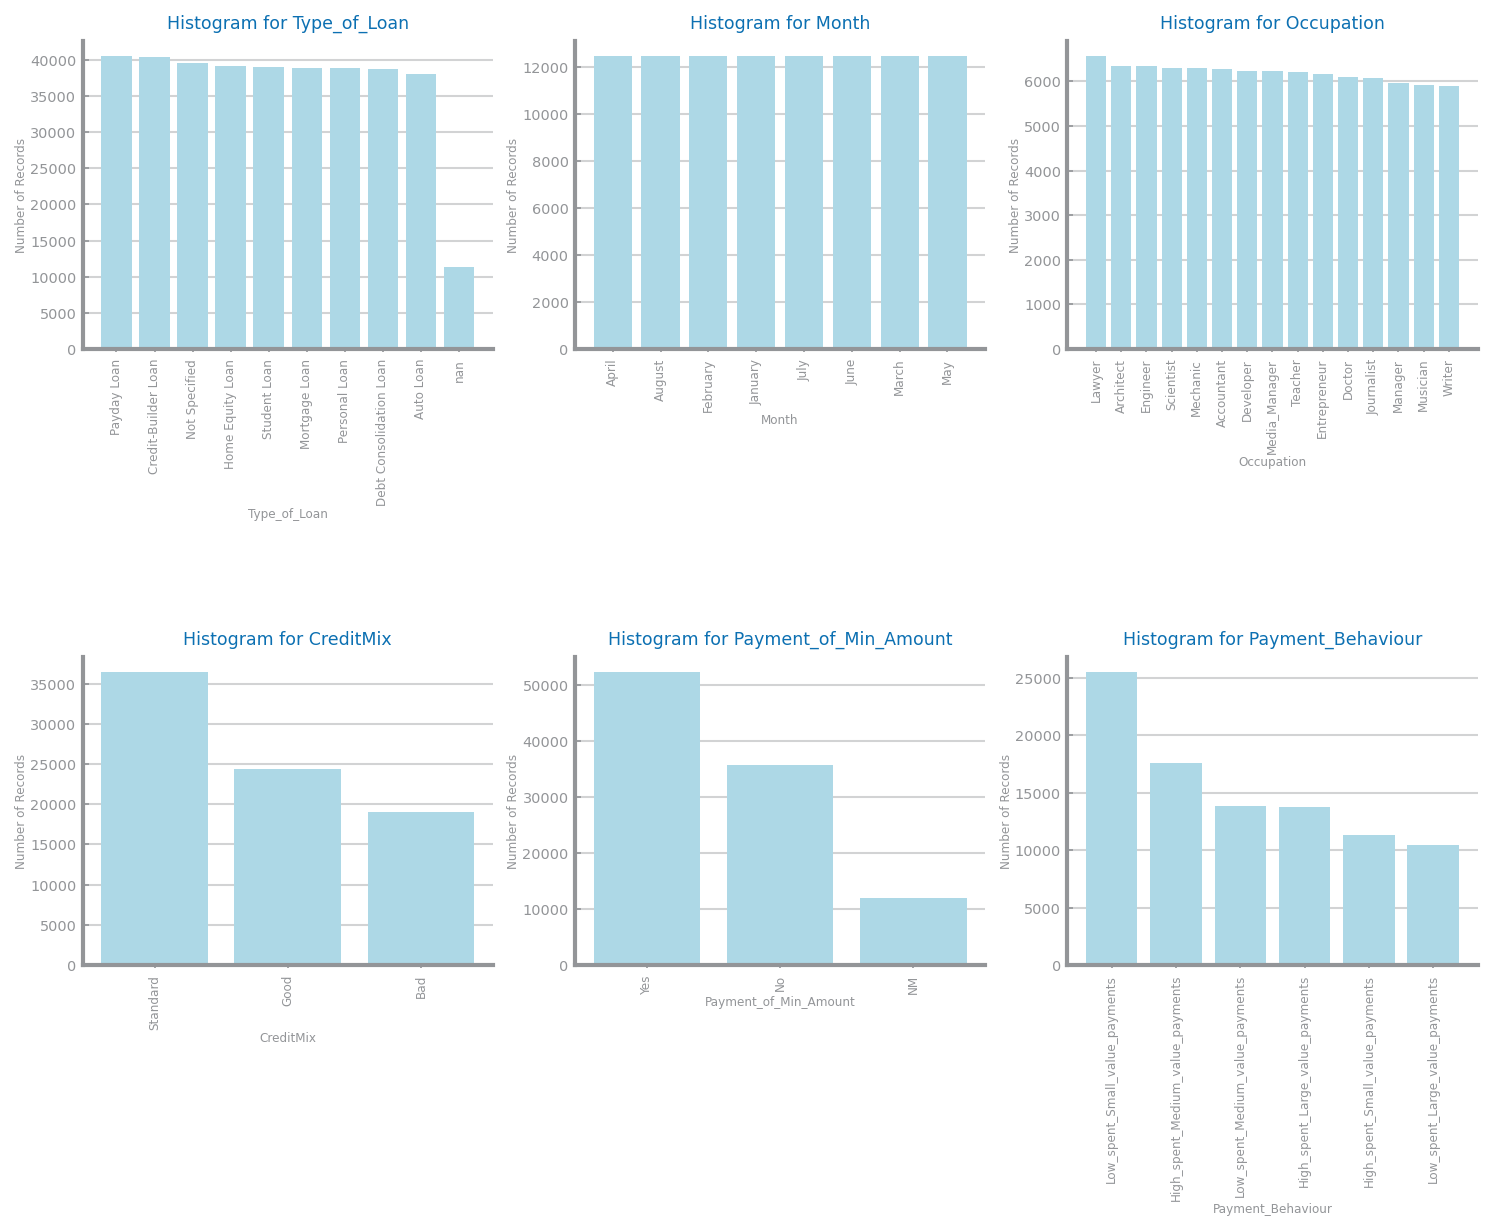

In [19]:
# Select columns with numerical and string data types
from matplotlib import pyplot as plt
import dslabs_functions as ds
print(df.select_dtypes(include="category").columns)
# Select columns with numerical and string data types
string_cols = df.select_dtypes(include="category").columns
symbolic_cols = [col for col in string_cols if col not in ["ID", "Name", "Customer_ID", "SSN", "Age", "Credit_History_Age"]]

# Combine numerical and string columns
rows, cols = ds.define_grid(len(symbolic_cols))

print(cols * ds.HEIGHT, rows * ds.HEIGHT)
fig, axs = plt.subplots(rows, cols, figsize=(cols * ds.HEIGHT, rows * ds.HEIGHT))
i, j = 0, 0
plt.subplots_adjust(hspace=1)

            
types = df["Type_of_Loan"]

types_values = []
for text in types:
    matches = re.findall(r'([\w\s-]+)(?:, | and |$)', str(text))
    m_filtered = [m if "and" not in m else m[4:] for m in matches]
    types_values += m_filtered

final = pd.Series(types_values).value_counts()

axs[i, j].set_title('Histogram for %s' % "Type_of_Loan")
axs[i, j].set_xlabel("Type_of_Loan")
axs[i, j].set_ylabel('Number of Records')
axs[i, j].bar(final.index, final.values, color = "lightblue")
axs[i, j].set_xticklabels(final.index, rotation=90)
i, j = i, j+1

for col in symbolic_cols:
    if col != "Type_of_Loan":
        axs[i, j].set_title('Histogram for %s' % col)
        axs[i, j].set_xlabel(col)
        axs[i, j].set_ylabel('Number of Records')
        value_counts = df[col].value_counts()
        axs[i, j].bar(value_counts.index, value_counts.values, color='lightblue')
        axs[i, j].set_xticklabels(value_counts.index, rotation=90)
        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)

plt.savefig(f"images/dim_dist/fig_8_histogram_symbolic_relevant.png")  # Save the figure
plt.show()

1. no de cima, variaveis que fazem sentido avaliar e analisar os diferentes niveis de granularidade como será visto nas proximas seccoes

*Try to fit different known distributions* (5 anos aqui a espera)

In [20]:
# from matplotlib.pyplot import subplots
# from dslabs_functions import set_chart_labels
# from dslabs_functions import define_grid, HEIGHT
# from numpy import log
# from pandas import Series
# from scipy.stats import norm, expon, lognorm
# from matplotlib.axes import Axes
# from dslabs_functions import plot_multiline_chart

# def compute_known_distributions(x_values: list) -> dict:
#     distributions = dict()
#     # Gaussian
#     mean, sigma = norm.fit(x_values)
#     distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
#     # Exponential
#     loc, scale = expon.fit(x_values)
#     distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
#     # LogNorm
#     sigma, loc, scale = lognorm.fit(x_values)
#     distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(
#         x_values, sigma, loc, scale
#     )
#     return distributions


# def histogram_with_distributions(ax: Axes, series: Series, var: str):
#     values: list = series.sort_values().to_list()
#     ax.hist(values, 20, density=True)
#     distributions: dict = compute_known_distributions(values)
#     plot_multiline_chart(
#         values,
#         distributions,
#         ax=ax,
#         title="Best fit for %s" % var,
#         xlabel=var,
#         ylabel="",
#     )

# if [] != numeric:
#     rows: int
#     cols: int
#     rows, cols = define_grid(len(numeric))
#     fig, axs = subplots(
#         rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
#     )
#     i: int
#     j: int
#     i, j = 0, 0
#     for n in range(len(numeric)-14):
#         histogram_with_distributions(axs[i, j], df[numeric[n]].dropna(), numeric[n])        
#         i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
#     show()

#### Figure 10 Outlier Study

*In order to compare the number of outliers using both the IQR and stdev criteria we can simlpy count the number of records satisfying each one of them.*

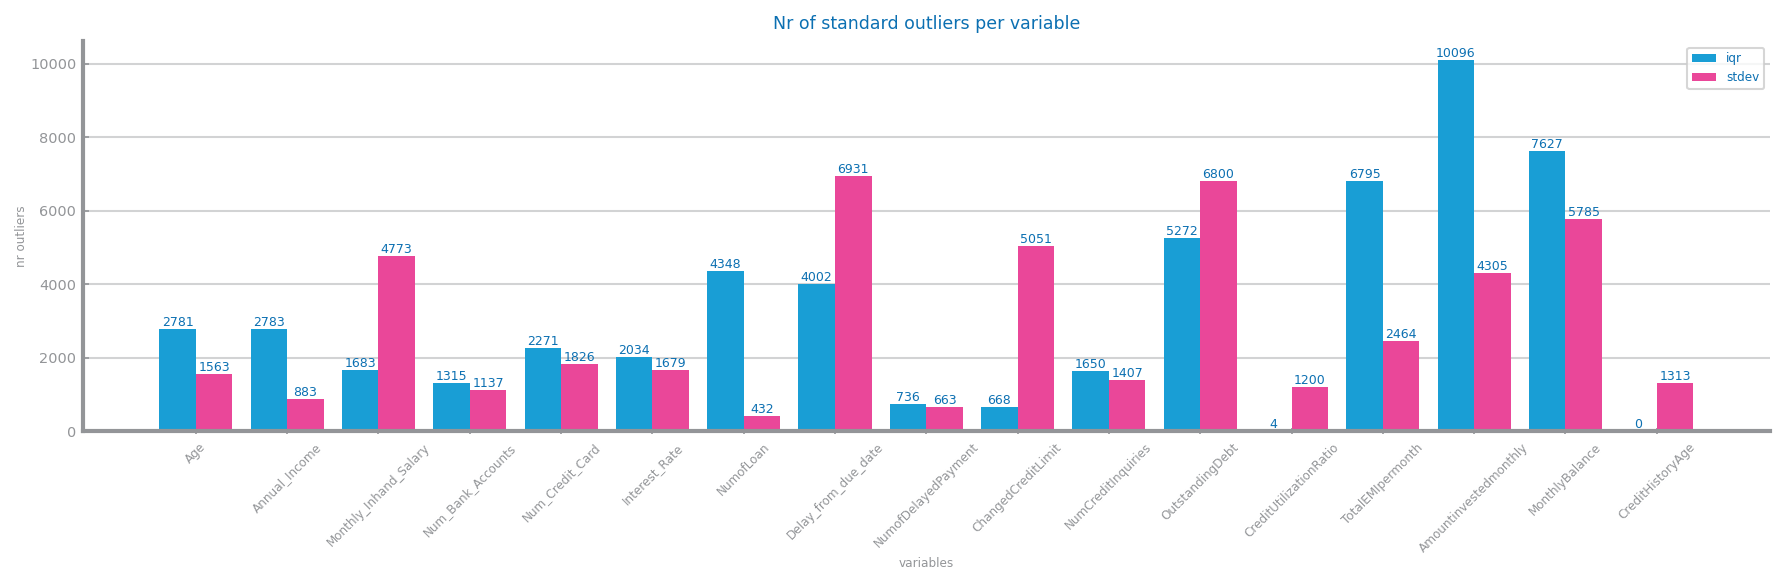

In [21]:
from dslabs_functions import count_outliers, plot_multibar_chart
import matplotlib.pyplot as plt

units = {
    "Age": "(Years)",
    "Annual_Income": "($)",
	"Monthly_Inhand_Salary": "($)",
	"Num_Bank_Accounts": "",
    "Num_Credit_Card": "",
	"Interest_Rate": "(%)",
	"NumofLoan": "",
	"Delay_from_due_date": "(days)",
    "NumofDelayedPayment": "",
	"ChangedCreditLimit": "",
	"NumCreditInquiries": "",
    "OutstandingDebt": "($)",
	"CreditUtilizationRatio": "",
	"TotalEMIpermonth": "($)",
    "Amountinvestedmonthly": "($)",
	"MonthlyBalance": "($)",
    "CreditHistoryAge": "(Years)"
}

hist_age = df["Credit_History_Age"]
hist_vals = []

for val in hist_age:
    matches = re.findall(r'(\d+) Years and (\d+) Months', str(val))
    if matches == []:
        hist_vals += [np.nan]
    else:
        hist_vals += [float(matches[0][0]) + ((float(matches[0][1])-1)/12) ,]

df["CreditHistoryAge"] = hist_vals

t = df.select_dtypes(include=['number', 'float'])
t["Age"] = pd.to_numeric(df['Age'], errors='coerce')
variables = t.columns
variables_list = variables.tolist()

if [] != variables_list:
    outliers: dict[str, int] = count_outliers(df, variables_list)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        variables_list,
        outliers,
        title="Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    plt.xticks(rotation=45)
    plt.tight_layout()  
    savefig(f"images/dim_dist/fig_10_outliers_study_1.png")
    show()
else:
    print("There are no numeric variables.")


*Note that you can change both the number of standard deviations and the IQR scaling factor, to adjust the found number of outliers to the ones humanly identified, by redefining the values for NR_STDEV and IQR_FACTOR.*

In [22]:
summary_numeric: DataFrame = df.select_dtypes(include=[np.number]).describe()
summary_numeric

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,NumofLoan,Delay_from_due_date,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance,CreditHistoryAge
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,98791.000000,90970.000000
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,637.412998,402.551258,18.349617
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,2043.319327,213.925499,8.311780
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760,0.000000
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,74.534002,270.106630,11.916667
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925681,336.731225,18.166667
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,470.262938,25.083333
max,8698.000000,2.419806e+07,15204.633330,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1602.040519,33.583333


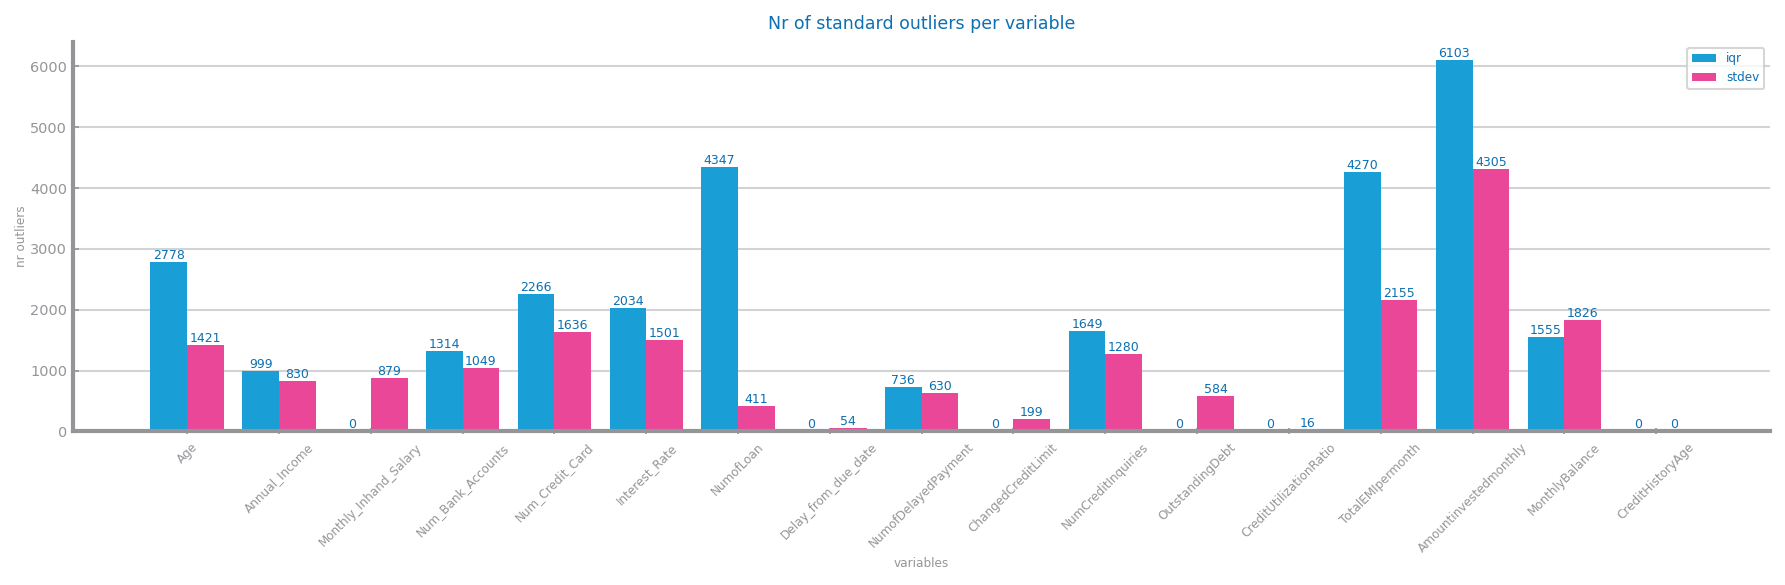

In [23]:
from dslabs_functions import count_outliers, plot_multibar_chart
import matplotlib.pyplot as plt

units = {
    "Age": "(Years)",
    "Annual_Income": "($)",
	"Monthly_Inhand_Salary": "($)",
	"Num_Bank_Accounts": "",
    "Num_Credit_Card": "",
	"Interest_Rate": "(%)",
	"NumofLoan": "",
	"Delay_from_due_date": "(days)",
    "NumofDelayedPayment": "",
	"ChangedCreditLimit": "",
	"NumCreditInquiries": "",
    "OutstandingDebt": "($)",
	"CreditUtilizationRatio": "",
	"TotalEMIpermonth": "($)",
    "Amountinvestedmonthly": "($)",
	"MonthlyBalance": "($)",
    "CreditHistoryAge": "(Years)"
}

hist_age = df["Credit_History_Age"]
hist_vals = []

for val in hist_age:
    matches = re.findall(r'(\d+) Years and (\d+) Months', str(val))
    if matches == []:
        hist_vals += [np.nan]
    else:
        hist_vals += [float(matches[0][0]) + ((float(matches[0][1])-1)/12) ,]

df["CreditHistoryAge"] = hist_vals

t = df.select_dtypes(include=['number', 'float'])
t["Age"] = pd.to_numeric(df['Age'], errors='coerce')
variables = t.columns
variables_list = variables.tolist()


if [] != variables_list:                                          # 2/3        #1.5/3
    outliers: dict[str, int] = count_outliers(df, variables_list, nrstdev=3, iqrfactor=3)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        variables_list,
        outliers,
        title="Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    plt.xticks(rotation=45)
    plt.tight_layout()  
    savefig(f"images/dim_dist/fig_10_outliers_study_2.png")
    show()
else:
    print("There are no numeric variables.")


Explicar que ver pelo nrsrdev da melhor conclusoes que pelo iqrfactor

nrstdev (Number of Standard Deviations):

This is the number of standard deviations away from the mean where you consider a data point to be an outlier.
Common values are 2 or 3, which correspond to approximately 95% and 99.7% coverage of data if the data is normally distributed.
If your data is not normally distributed or if you want to be more lenient or strict in defining outliers, you might choose a different value.
iqrfactor (Interquartile Range Factor):

This multiplier is used in conjunction with the interquartile range (IQR) to define outliers.
A common value is 1.5 for a relatively standard outlier detection, and 3 for extreme outliers, based on the Tukey's method.
If your data has many natural fluctuations or you wish to detect only the most extreme outliers, you might use a higher factor.

Looking at your scatter plot and the bar chart showing the number of standard outliers per variable, you should consider the following:

If the current setting is flagging too many points as outliers (which might actually be true values), you might want to increase nrstdev and iqrfactor to a higher value.
If the current setting is not flagging enough points as outliers (and you suspect that more outliers exist), you might want to decrease nrstdev and iqrfactor to a lower value.
Ultimately, the choice of these parameters depends on your specific data and the context in which you are detecting outliers. If you have domain knowledge or previous research to guide your choice, that will be beneficial. Otherwise, you might need to experiment with different values and see how they affect the detection of outliers in your data.

#### Figure 12 Class Distribution

!! NOT BALANCED !!

Credit_Score
Good    71002
Poor    28998
Name: count, dtype: int64


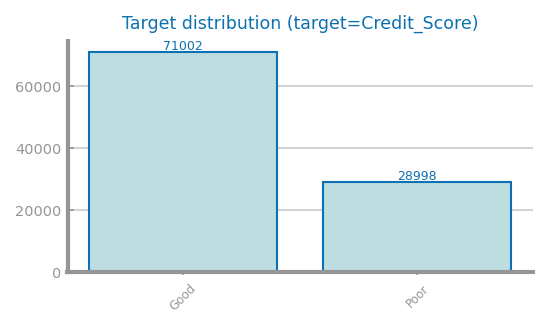

In [24]:
from pandas import Series

target = "Credit_Score"

values: Series = df[target].value_counts()
print(values)

figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
savefig(f"images/dim_dist/fig_12_class_distribution.png")
show()